## Day 32 Lecture 1 Assignment

In this assignment, we will learn about K nearest neighbor regression. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

The meaning of the different columns can be found here: https://www.kaggle.com/tonypriyanka2913/employee-absenteeism

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.shape

(740, 21)

In [4]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [5]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

Find which variables have the highest pairwise correlation and remove them from our dataset. Additionally, try to think of which variables are correlated by looking at the column names and remove those columns as well.

Note: When choosing between two categorical variables that are correlated, you often want to keep the one with fewer unique values. Why might that be? (Think about the cons of KNN.)

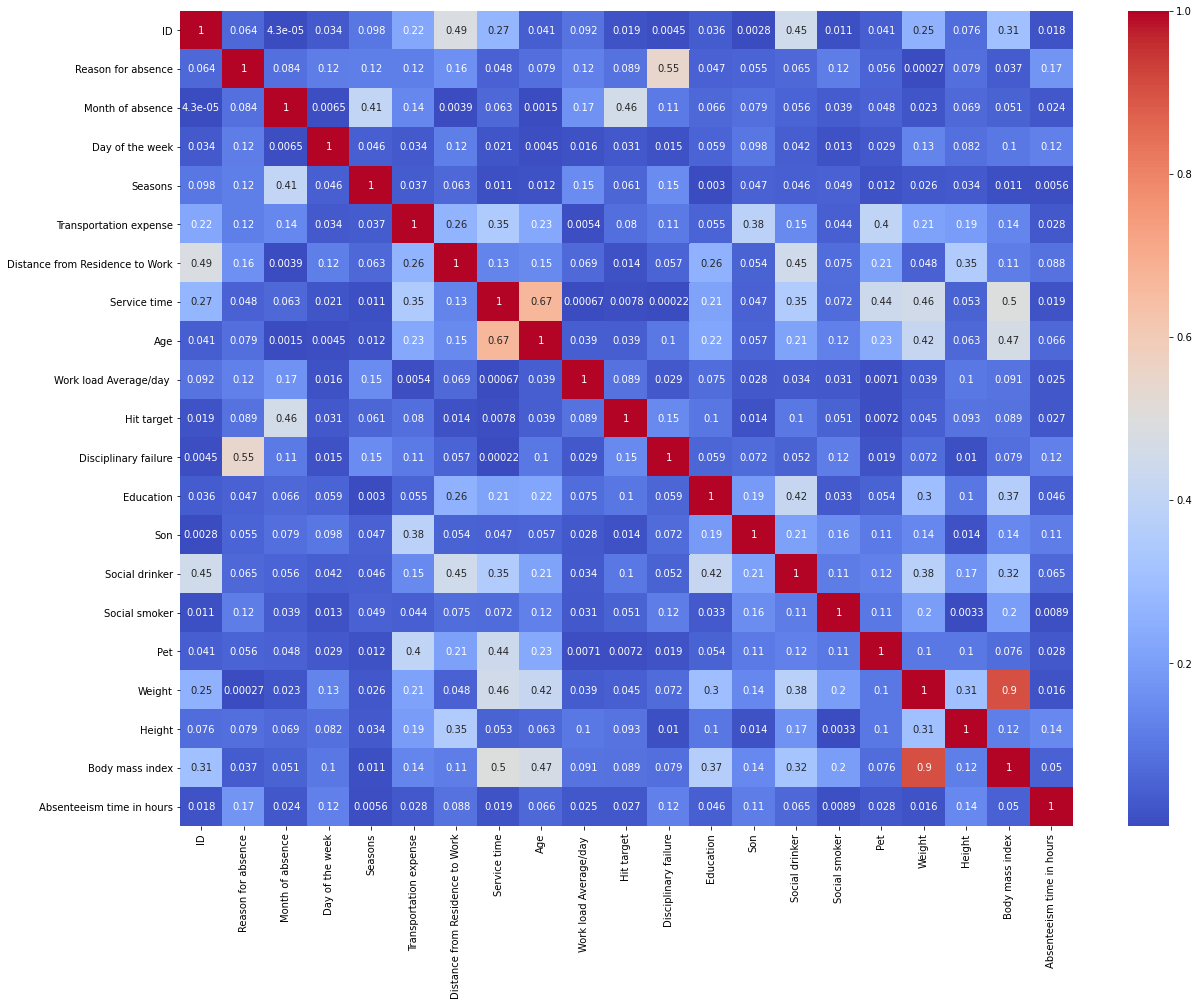

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(abs(absent.corr()), annot=True, cmap='coolwarm')
plt.show()

In [7]:
numerical = absent.select_dtypes(include=['number'])
for i in numerical:
    column = numerical[i]
    print({i:column.nunique()})

{'ID': 36}
{'Reason for absence': 28}
{'Month of absence': 13}
{'Day of the week': 5}
{'Seasons': 4}
{'Transportation expense': 24}
{'Distance from Residence to Work': 25}
{'Service time': 18}
{'Age': 22}
{'Work load Average/day ': 38}
{'Hit target': 13}
{'Disciplinary failure': 2}
{'Education': 4}
{'Son': 5}
{'Social drinker': 2}
{'Social smoker': 2}
{'Pet': 6}
{'Weight': 26}
{'Height': 14}
{'Body mass index': 17}
{'Absenteeism time in hours': 19}


In [8]:
drop_corr = absent.drop(columns=['Weight','Age', 'Month of absence'])

Figure out which columns actually contain sneaky categorical variables and turn those into dummy variables.

In [9]:
drop_corr.Pet.value_counts()

0    460
1    138
2     96
4     32
8      8
5      6
Name: Pet, dtype: int64

In [10]:
# answer below:
numerical = drop_corr.select_dtypes(include=['number'])
for i in numerical:
    column = numerical[i]
    print({i:column.nunique()})

{'ID': 36}
{'Reason for absence': 28}
{'Day of the week': 5}
{'Seasons': 4}
{'Transportation expense': 24}
{'Distance from Residence to Work': 25}
{'Service time': 18}
{'Work load Average/day ': 38}
{'Hit target': 13}
{'Disciplinary failure': 2}
{'Education': 4}
{'Son': 5}
{'Social drinker': 2}
{'Social smoker': 2}
{'Pet': 6}
{'Height': 14}
{'Body mass index': 17}
{'Absenteeism time in hours': 19}


In [11]:
absent_df = pd.get_dummies(drop_corr, columns=['Seasons', 'Pet', 'Son', 'Day of the week'], drop_first=True)
absent_df

,ID,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Disciplinary failure,Education,Social drinker,Social smoker,Height,Body mass index,Absenteeism time in hours,Seasons_2,Seasons_3,Seasons_4,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8,Son_1,Son_2,Son_3,Son_4,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6
0,11,26,289,36,13,239.554,97,0,1,1,0,172,30,4,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,36,0,118,13,18,239.554,97,1,1,1,0,178,31,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,3,23,179,51,18,239.554,97,0,1,1,0,170,31,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,7,7,279,5,14,239.554,97,0,1,1,1,168,24,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,11,23,289,36,13,239.554,97,0,1,1,0,172,30,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,289,36,13,264.604,93,0,1,1,0,172,30,8,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
736,1,11,235,11,14,264.604,93,0,3,0,0,172,29,4,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
737,4,0,118,14,13,271.219,95,0,1,1,0,170,34,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
738,8,0,231,35,14,271.219,95,0,1,1,0,170,35,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


Split the data into train and test with test containing 20% of the data, then scale your features.

In [12]:
# answer below:
from sklearn.model_selection import train_test_split

y = absent_df['Absenteeism time in hours']

X = absent_df.drop(columns=['Absenteeism time in hours'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train a series of KNN regression models with a range of K values. For each K value, use cross validation of the training set and find the average RMSE score. Make a plot of K versus average RMSE. What is the best value of K?

In [14]:
# answer below
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()

KNN.fit(X_train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [15]:
from sklearn.metrics import mean_squared_error

k_list = np.arange(1, 16, 2)
train_errors = []
test_errors = []

for i in k_list:
  neigh = KNeighborsRegressor(n_neighbors=i)
  neigh.fit(X_train_scaled, y_train)
  y_pred_train = neigh.predict(X_train_scaled)
  y_pred_test = neigh.predict(X_test_scaled)
  train_errors.append(mean_squared_error(y_train, y_pred_train, squared=False))
  test_errors.append(mean_squared_error(y_test, y_pred_test, squared=False))

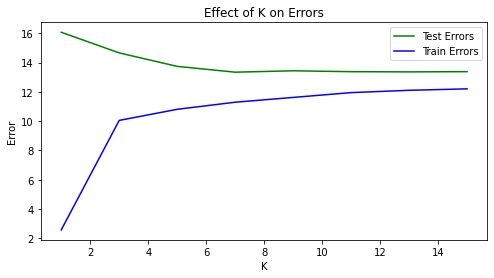

In [16]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(k_list, test_errors, '-g', label='Test Errors')
ax1.plot(k_list, train_errors, '-b', label='Train Errors')
ax1.set(xlabel='K', ylabel='Error')
ax1.set_title('Effect of K on Errors')
ax1.legend()
plt.show()

Using your best K, fit a model to all your training data and show the RMSE for the training and testing sets.

In [17]:
# answer below
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=5)

KNN.fit(X_train_scaled, y_train)

y_pred_train = neigh.predict(X_train_scaled)
y_pred_test = neigh.predict(X_test_scaled)

print('Training Score: {:.4f}'.format(KNN.score(X_train_scaled,y_train)))
print('Testing Score: {:.4f}'.format(KNN.score(X_test_scaled,y_test)))

print('Training Set RMSE: {:.4f}'.format(mean_squared_error(y_train, y_pred_train, squared=False)))
print('Testing Set RMSE: {:.4f}'.format(mean_squared_error(y_test, y_pred_test, squared=False)))

Training Score: 0.3330
Testing Score: -0.0211
Training Set RMSE: 12.2086
Testing Set RMSE: 13.3829


In [18]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy = 'mean')
dummy.fit(X_train_scaled, y_train)
dummy.score(X_test_scaled,y_test)

-0.00916946256340756

Create a homoscedasticity plot (also called residual plot). How is your model performing? What ideas do you have to improve the model?

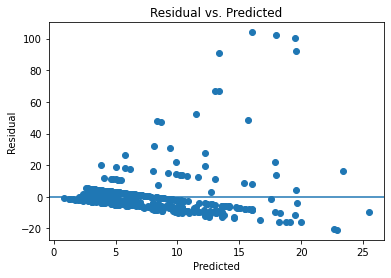

In [19]:
# answer below
predictions = y_pred_train
errors = y_train - y_pred_train

plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()